# watermarkd - Baseline Experiments 🔍
Initial test notebook to explore watermark detection ideas.

In [ ]:
#pip install pandas numpy matplotlib scikit-learn nltk


     ---------------------------------------- 0.0/41.5 kB ? eta -:--:--
     ------------------ ------------------- 20.5/41.5 kB 682.7 kB/s eta 0:00:01
     -------------------------------------- 41.5/41.5 kB 505.0 kB/s eta 0:00:00
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
    --------------------------------------- 0.0/1.5 MB ? eta -:--:--
   --- ------------------------------------ 0.1/1.5 MB 2.4 MB/s eta 0:00:01
   ------- -------------------------------- 0.3/1.5 MB 2.5 MB/s eta 0:00:01
   ----------- ---------------------------- 0.4/1.5 MB 3.1 MB/s eta 0:00:01
   ------------------ --------------------- 0.7/1.5 MB 3.4 MB/s eta 0:00:01
   ----------------------- ---------------- 0.9/1.5 MB 3.8 MB/s eta 0:00:01
   ---------------------------- ----------- 1.1/1.5 MB 3.8 MB/s eta 0:00:01
   --------------------------------- ------ 1.3/1.5 MB 3.7 MB/s eta 0:00:01
   ----------------------------------


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
print("Notebook is ready!")


Notebook is ready!


In [8]:
import pandas as pd

df_human = pd.read_csv("../data/human_samples.csv")
df_ai = pd.read_csv("../data/ai_samples.csv")

df = pd.concat([df_human, df_ai]).reset_index(drop=True)

Extract Stylometric Features

In [12]:
import nltk # for tokenizing text into words and sentences
import string # for getting list of punctuations

#nltk.download('punkt_tab') # model by nltk for word and sentence tokenization

# take a block of text and calculate features related to writing style
def extract_features(text):

    # split into sentences and words
    sentences = nltk.sent_tokenize(text)
    words = nltk.word_tokenize(text)

    word_count = len(words)
    sentence_count = len(sentences)

    avg_word_length = sum(len(w) for w in words)/ word_count if word_count> 0 else 0
    punctuation_count = sum(1 for c in text if c in string.punctuation)

    return pd.Series({
        "word_count": word_count,
        "sentence_count": sentence_count,
        "avg_word_length": avg_word_length,
        "punctuation_count": punctuation_count
    })

df_features = df["Text"].apply(extract_features)
df = pd.concat([df,df_features], axis = 1)

Visualize Differences

In [14]:
print(df[["word_count", "sentence_count", "avg_word_length", "punctuation_count"]].dtypes)

word_count           float64
sentence_count       float64
avg_word_length      float64
punctuation_count    float64
dtype: object


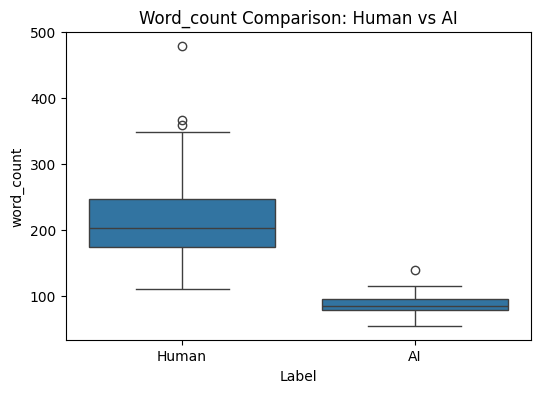

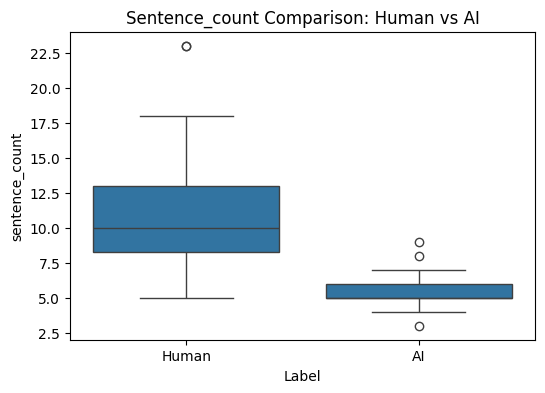

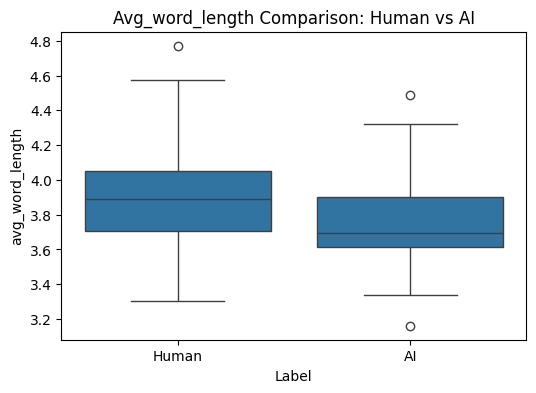

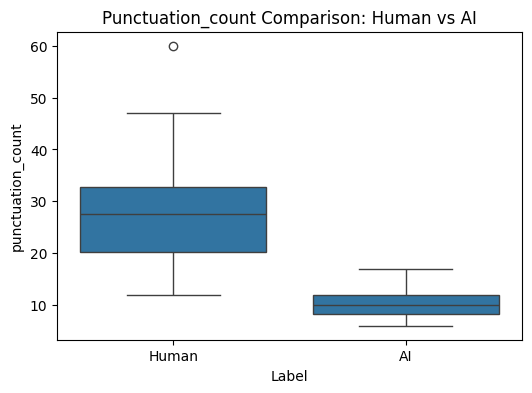

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

features_to_plot = ["word_count", "sentence_count", "avg_word_length", "punctuation_count"]

for feature in features_to_plot:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df["Label"], y=df[feature])
    plt.title(f"{feature.capitalize()} Comparison: Human vs AI")
    plt.show()


## Stylometric EDA: Initial Observations (5 Human vs 5 AI Samples)

We extracted stylometric features including word count, sentence count, average word length, and punctuation usage across a small test dataset.
Here’s what stood out:

Word Count: Human written samples varied greatly but AI stuck closer to 200-220 words.

Sentence Count: Human responses had more variation and occasional long-winded replies. AI samples were more uniform.

Avg Word Length: Human texts showed narrower range, while AI stuck closer to 3.6–4.2 characters/word.

Punctuation Count: Human samples displayed more expressive punctuation. AI tends to use cleaner, neutral structure — an early marker for differentiation.

These patterns will be retested once we expand the dataset to 100+ samples.

## Stylometric EDA Summary: Human vs AI (100 Samples)

We extracted four stylometric features from 50 human-written and 50 AI-generated text samples to explore how writing style varies between the two. Here’s what we found:

---

### Word Count
- **Humans** showed higher variance in word count, with multiple long-form outliers crossing 300+ words.
- **AI** responses were consistently shorter, tightly centered around 80–100 words — likely a result of prompt length tuning or token constraints.

### Sentence Count
- **Human** responses ranged widely in sentence length (5–23 sentences), with more paragraph-style writing.
- **AI** stuck to short, structured responses, rarely exceeding 7 sentences.

### Average Word Length
- Both classes hovered between 3.5–4.2 characters/word.
- **Humans** had slightly more lexical spread, suggesting varied vocabulary and natural usage of longer, expressive words.

### Punctuation Count
- **Humans** used more expressive punctuation — commas, ellipses, exclamations — with totals often 2–3× higher than AI.
- **AI** punctuation was tighter and cleaner, likely following model formatting biases.

---

### Key Insight
Even with simple features like word count and punctuation, there's a **visible stylometric fingerprint** difference between AI and human text — enough to train a first-pass classifier.
